# Problem Statement

An education company named X Education sells online courses to industry professionals. The company markets its courses on several websites and search engines like Google.Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals.

Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%

# Goals

X Education needs help to select the most promising leads, i.e. the leads that are most likely to convert into paying customers.

The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with a higher lead score have a higher conversion chance and the customers with a lower lead score have a lower conversion chance.
The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.


Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.

There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step. Also, make sure you include this in your final PPT where you'll make recommendations.

## STEP 1: Reading and Understanding Data

In [1]:
#supress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
#Reading dataset
lead = pd.read_csv("Leads.csv")
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [5]:
lead.shape

(9240, 37)

In [6]:
lead.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


# Step 2: Data Cleaning and Manipulation

### Checking and Treating Null Values

In [7]:
#Check Missing Values in dataframe
lead.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [8]:
#check percentage of Null values for each column
percent_miss = lead.isnull().sum()/len(lead)*100
percent_miss

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [9]:
lead =lead.replace('Select',np.nan)

In [10]:
#columns with null values more than 45%
x = percent_miss[percent_miss>=45]
x.sort_values(ascending = False, inplace = True)
x

Lead Quality                   51.590909
Asymmetrique Activity Index    45.649351
Asymmetrique Profile Index     45.649351
Asymmetrique Activity Score    45.649351
Asymmetrique Profile Score     45.649351
dtype: float64

In [11]:
#dropping columns with missing values more than 45%
for i in x.index:
    lead.drop(i, axis=1, inplace = True)

In [12]:
percent_miss = lead.isnull().sum()/len(lead)*100
percent_miss.sort_values(ascending = False)

How did you hear about X Education               78.463203
Lead Profile                                     74.188312
City                                             39.707792
Specialization                                   36.580087
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
TotalVisits                                       1.482684
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Lead Source                                       0.389610
Receive More Updates About Our Courses            0.000000
Update me on Supply Chain Content                 0.000000
Prospect ID                                       0.000000
Digital Advertisement                             0.000000
Get updates on DM Content                         0.0000

In [13]:
#Treating columns with null values less than 30%
# What matters most to you in choosing a course -  29.318182

lead['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

What matters most to you in choosing a course has the level Better Career Prospects 6528 times while the other two levels appear once twice and once respectively. So we are dropping this column 


In [14]:
lead = lead.drop(['What matters most to you in choosing a course'], axis=1)

In [15]:
#Lead Profile  29.318182%
lead['Lead Profile'].value_counts()

Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [16]:
#What is your current occupation                  29.112554
lead['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [17]:
#Country                                          26.634199
lead['Country'].value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

In [18]:
#How did you hear about X Education               23.885281
lead["How did you hear about X Education"].value_counts()

Online Search            808
Word Of Mouth            348
Student of SomeSchool    310
Other                    186
Multiple Sources         152
Advertisements            70
Social Media              67
Email                     26
SMS                       23
Name: How did you hear about X Education, dtype: int64

In [19]:
#Specialization                                   15.562771
lead["Specialization"].value_counts()


Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Travel and Tourism                   203
Media and Advertising                203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: Specialization, dtype: int64

In [20]:
#City                                             15.367965
lead["City"].value_counts()

Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [21]:
#dropping some columns
#country because its of no use in analysis
# How did you hear about X Education because it already has option select in its counts were student has not selected any option, so its of no use.
lead.drop(['How did you hear about X Education', 'Country'], axis = 1, inplace = True)


In [22]:
lead['Specialization']=lead['Specialization'].replace(['Finance Management','Human Resource Management','Marketing Management','Operations Management',
                                                 'IT Projects Management','Supply Chain Management','Healthcare Management','Hospitality Management',
                                                 'Retail Management'],'Management_Specializations')
lead['Specialization'] =lead['Specialization'].replace(np.nan,'Not_specified')

In [23]:
#checking null values
percent_miss = lead.isnull().sum()/len(lead)*100
percent_miss.sort_values(ascending = False)

Lead Profile                                74.188312
City                                        39.707792
Tags                                        36.287879
What is your current occupation             29.112554
TotalVisits                                  1.482684
Page Views Per Visit                         1.482684
Last Activity                                1.114719
Lead Source                                  0.389610
Prospect ID                                  0.000000
Through Recommendations                      0.000000
Receive More Updates About Our Courses       0.000000
Get updates on DM Content                    0.000000
Update me on Supply Chain Content            0.000000
Newspaper                                    0.000000
I agree to pay the amount through cheque     0.000000
A free copy of Mastering The Interview       0.000000
Digital Advertisement                        0.000000
Magazine                                     0.000000
X Education Forums          

In [24]:
lead['Tags']=lead['Tags'].replace(np.nan,'Not Specified')
lead['Tags']=lead['Tags'].replace(['switched off','Busy','Lost to EINS','Not doing further education','Interested  in full time MBA'
                              ,'Graduation in progress','invalid number','Diploma holder (Not Eligible','wrong number given','opp hangup'
                              ,'number not provided','in touch with EINS','Lost to Others','Still Thinking','Want to take admission but has financial problems','In confusion whether part time or DLP','Interested in Next batch','Lateral student','Shall take in the next coming month',
                              'University not recognized','Recognition issue (DEC approval)','Diploma holder (Not Eligible)'],'Others')

In [25]:
#What is your current occupation             29.112554%
lead["What is your current occupation"].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [26]:
lead['What is your current occupation'] =lead['What is your current occupation'].replace(np.nan,'Unemployed')
lead['What is your current occupation']=lead['What is your current occupation'].replace(['Housewife','Businessman','Other'],'Others')

In [27]:
lead['City']=lead['City'].replace(np.nan,'Mumbai')

In [28]:
#TotalVisits                                  1.482684
lead["TotalVisits"].value_counts()

0.0      2189
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
21.0        6
23.0        6
24.0        5
25.0        5
27.0        5
22.0        3
29.0        2
28.0        2
26.0        2
141.0       1
55.0        1
30.0        1
43.0        1
74.0        1
41.0        1
54.0        1
115.0       1
251.0       1
32.0        1
42.0        1
Name: TotalVisits, dtype: int64

In [29]:
lead.TotalVisits.median()

3.0

In [30]:
# imputing the null values in TotalVisits by the median value which is 3.0

lead['TotalVisits'] = lead['TotalVisits'].replace(np.nan, lead['TotalVisits'].median())

In [31]:
#Page Views Per Visit                         1.482684
lead["Page Views Per Visit"].value_counts()

0.00    2189
2.00    1795
3.00    1196
4.00     896
1.00     651
        ... 
3.43       1
2.56       1
6.33       1
1.64       1
2.08       1
Name: Page Views Per Visit, Length: 114, dtype: int64

In [32]:
# imputing the null values in page views per visit by the median value

lead['Page Views Per Visit'] = lead['Page Views Per Visit'].replace(np.nan, lead['Page Views Per Visit'].median())

In [33]:
#Last Activity                                1.114719%
lead["Last Activity"].value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [34]:
lead['Last Activity'] =lead['Last Activity'].replace(np.nan,'Email Opened')
lead['Last Activity']=lead['Last Activity'].replace(['Unreachable','Unsubscribed','Had a Phone Conversation','Approached upfront','View in browser link Clicked',
                            'Email Received','Email Marked Spam','Visited Booth in Tradeshow','Resubscribed to emails'],'Others')

In [35]:
#Lead Source                                  0.389610%
lead["Lead Source"].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [36]:
#replacing the null values with most occuring value in the column
lead['Lead Source'] =lead['Lead Source'].replace(np.nan,'Google')
lead['Lead Source']=lead['Lead Source'].replace('google','Google')
lead['Lead Source']=lead['Lead Source'].replace(['Facebook','youtubechannel'],'Social Media ')
lead['Lead Source']=lead['Lead Source'].replace(['bing','Click2call','Press_Release','Live Chat','testone','Pay per Click Ads',
                                             'welearnblog_Home','WeLearn','blog','NC_EDM'],'Others')

In [37]:
#checking null values
percent_miss = lead.isnull().sum()/len(lead)*100
percent_miss.sort_values(ascending = False)

Lead Profile                                74.188312
Prospect ID                                  0.000000
Newspaper Article                            0.000000
A free copy of Mastering The Interview       0.000000
I agree to pay the amount through cheque     0.000000
City                                         0.000000
Get updates on DM Content                    0.000000
Update me on Supply Chain Content            0.000000
Tags                                         0.000000
Receive More Updates About Our Courses       0.000000
Through Recommendations                      0.000000
Digital Advertisement                        0.000000
Newspaper                                    0.000000
X Education Forums                           0.000000
Magazine                                     0.000000
Lead Number                                  0.000000
Search                                       0.000000
What is your current occupation              0.000000
Specialization              

In [38]:
lst=['Do Not Email','Do Not Call','Search','Magazine','Newspaper Article','X Education Forums',
     'Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
    'Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque'
    ,'A free copy of Mastering The Interview']

for i in lst:
    print(lead[i].value_counts())

No     8506
Yes     734
Name: Do Not Email, dtype: int64
No     9238
Yes       2
Name: Do Not Call, dtype: int64
No     9226
Yes      14
Name: Search, dtype: int64
No    9240
Name: Magazine, dtype: int64
No     9238
Yes       2
Name: Newspaper Article, dtype: int64
No     9239
Yes       1
Name: X Education Forums, dtype: int64
No     9239
Yes       1
Name: Newspaper, dtype: int64
No     9236
Yes       4
Name: Digital Advertisement, dtype: int64
No     9233
Yes       7
Name: Through Recommendations, dtype: int64
No    9240
Name: Receive More Updates About Our Courses, dtype: int64
No    9240
Name: Update me on Supply Chain Content, dtype: int64
No    9240
Name: Get updates on DM Content, dtype: int64
No    9240
Name: I agree to pay the amount through cheque, dtype: int64
No     6352
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64


In [39]:
#dropping those columns which have only value no and it will be of no use for analysis
lead=lead.drop(['Do Not Call','Search','Magazine','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement'
           ,'Through Recommendations','Receive More Updates About Our Courses'
            ,'Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque'
           ,'Do Not Email','Last Notable Activity'],axis=1)


In [40]:
#checking duplicates
lead[lead.duplicated(keep=False)]

,Prospect ID,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,Lead Profile,City,A free copy of Mastering The Interview


No duplicates found in the data

In [41]:
lead.shape

(9240, 15)

In [42]:
lead.dtypes

Prospect ID                                object
Lead Number                                 int64
Lead Origin                                object
Lead Source                                object
Converted                                   int64
TotalVisits                               float64
Total Time Spent on Website                 int64
Page Views Per Visit                      float64
Last Activity                              object
Specialization                             object
What is your current occupation            object
Tags                                       object
Lead Profile                               object
City                                       object
A free copy of Mastering The Interview     object
dtype: object

#  Outliers Check

In [43]:
lead.describe(percentiles = [0.01,0.05,.25, .5, .75, .90, .95, .99])

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000
mean,617188.435606,0.385390,3.438636,487.698268,2.357440
std,23405.995698,0.486714,4.819024,548.021466,2.145781
min,579533.000000,0.000000,0.000000,0.000000,0.000000
1%,580317.120000,0.000000,0.000000,0.000000,0.000000
5%,582869.900000,0.000000,0.000000,0.000000,0.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000
90%,650506.100000,1.000000,7.000000,1380.000000,5.000000


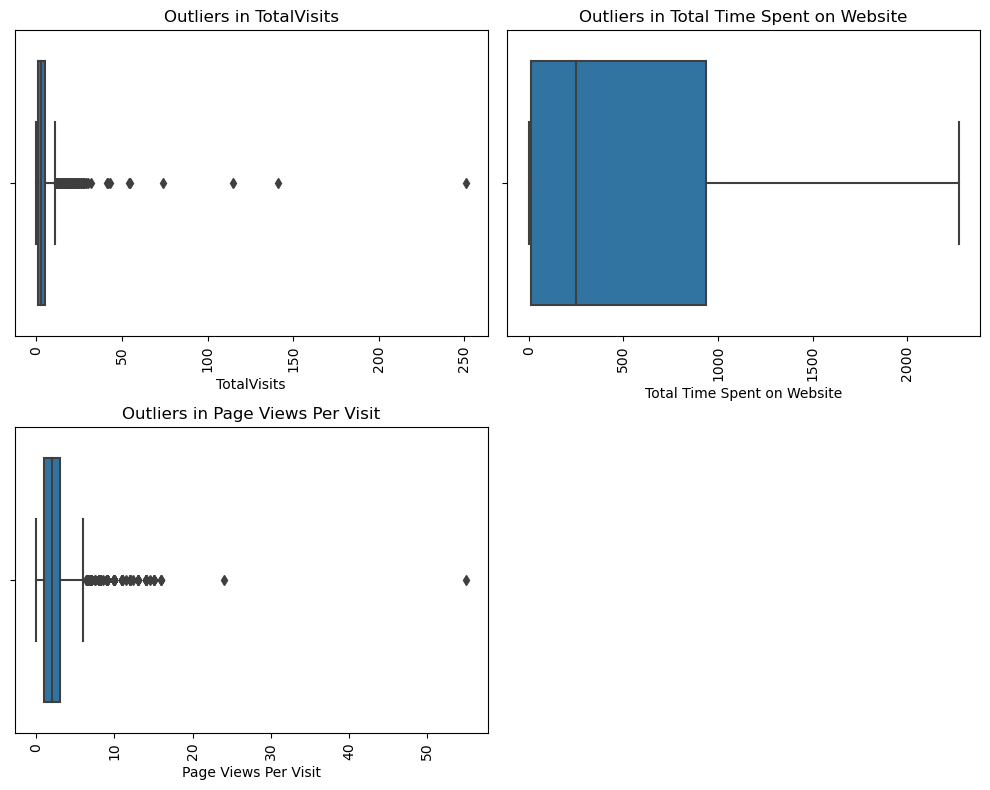

In [44]:
def boxplot(x,fig,):
    plt.subplot(2,2,fig)
    sns.boxplot(x = x, data = lead)
    plt.title('Outliers in'+' '+ x)
    plt.xlabel(x)
    plt.xticks(rotation = 90)

                         
plt.figure(figsize =(10,8))
                         
boxplot('TotalVisits',1)
boxplot('Total Time Spent on Website',2)
boxplot('Page Views Per Visit',3)

plt.tight_layout()

In [45]:
# Removing values beyond 99%
nn_quartile_total_visits = lead['TotalVisits'].quantile(0.99)
lead = lead[lead["TotalVisits"] < nn_quartile_total_visits]

In [46]:
nn_quartile_page_visits = lead['Page Views Per Visit'].quantile(0.99)
lead = lead[lead["Page Views Per Visit"] < nn_quartile_page_visits]

In [47]:
nn_quartile_page_visits = lead['Total Time Spent on Website'].quantile(0.99)
lead = lead[lead["Total Time Spent on Website"] < nn_quartile_page_visits]

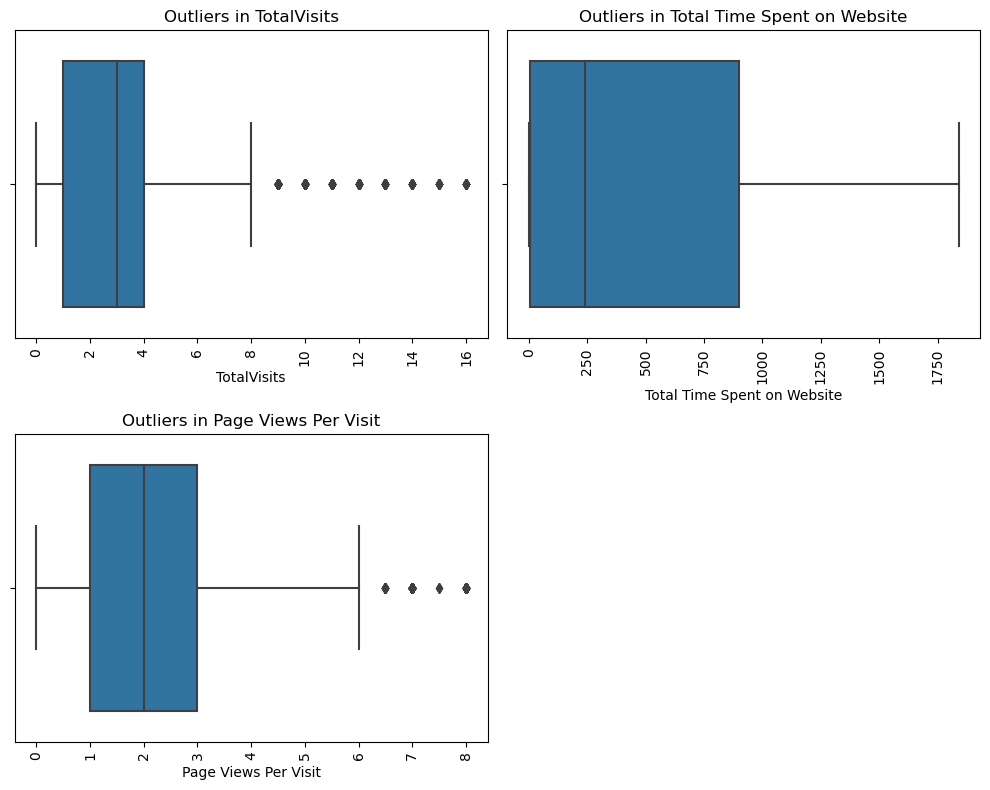

In [48]:
#Rechecking Outliers
def boxplot(x,fig,):
    plt.subplot(2,2,fig)
    sns.boxplot(x = x, data = lead)
    plt.title('Outliers in'+' '+ x)
    plt.xlabel(x)
    plt.xticks(rotation = 90)

                         
plt.figure(figsize =(10,8))
                         
boxplot('TotalVisits',1)
boxplot('Total Time Spent on Website',2)
boxplot('Page Views Per Visit',3)

plt.tight_layout()

# Step 3: Data Analysis

### Univariate Analysis

In [49]:
#plotting categorical columns
def plot_columns(i):
    plt.figure(figsize =(15,5))
    sns.countplot(lead[i], hue= lead.Converted, palette='Set1')
    plt.xticks(rotation = 90)
    plt.title('Target variable in'+' '+ i)
    plt.xlabel(i)
    plt.show()

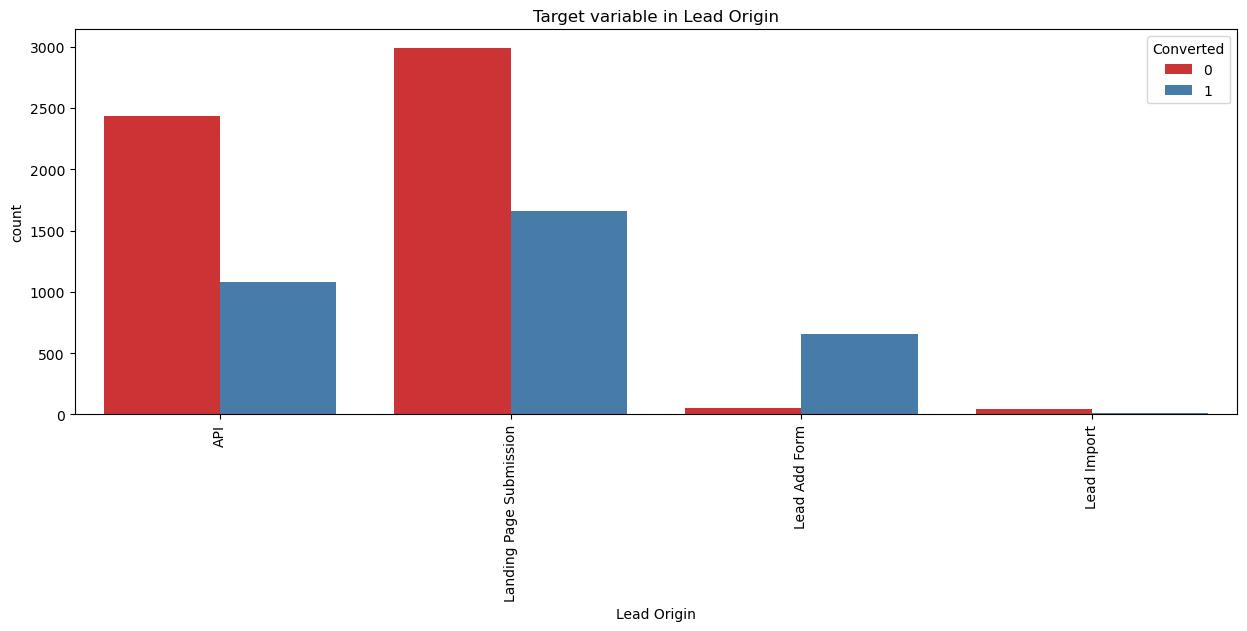

In [50]:
plot_columns('Lead Origin')

 Landing page submission constitues of majority of leads, and lead add form consists of high probability of lead conversions.
 API and Lead import has least conversion rate though leads from lead import are very less in number.
 so to increase more lead conversion its important to focus on Leads from  API and Landing page submission, and to increase more leads from Lead add form.

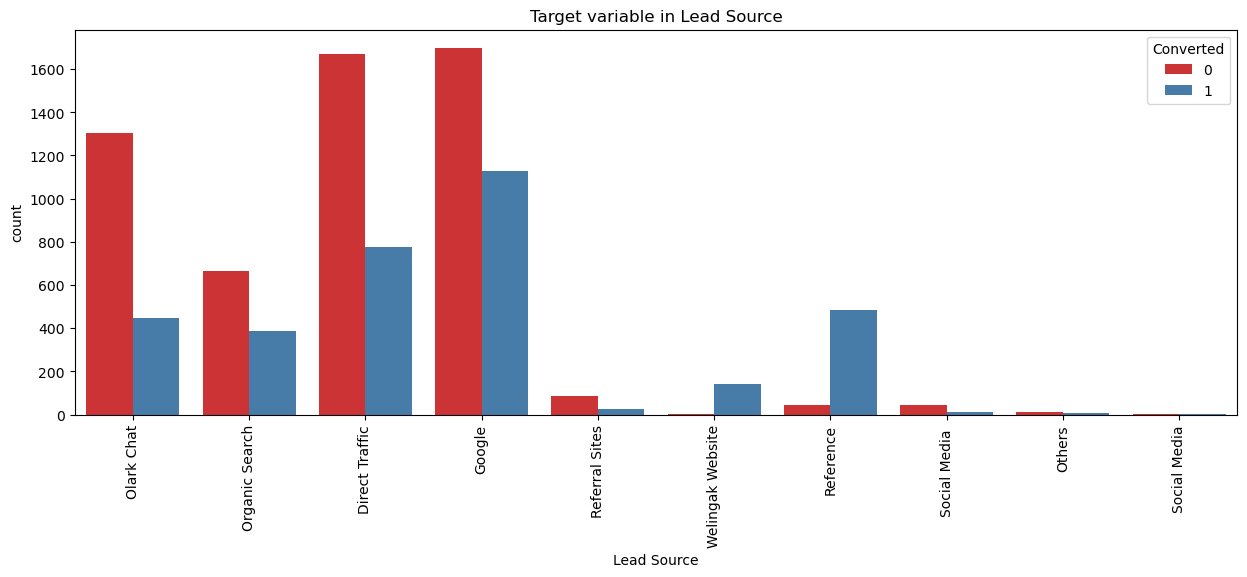

In [51]:
plot_columns('Lead Source')

Majority of leads are from  Google and direct traffic. 
probability of positive lead conversion is maximumn from refrences and google. 
So need to focus more on these

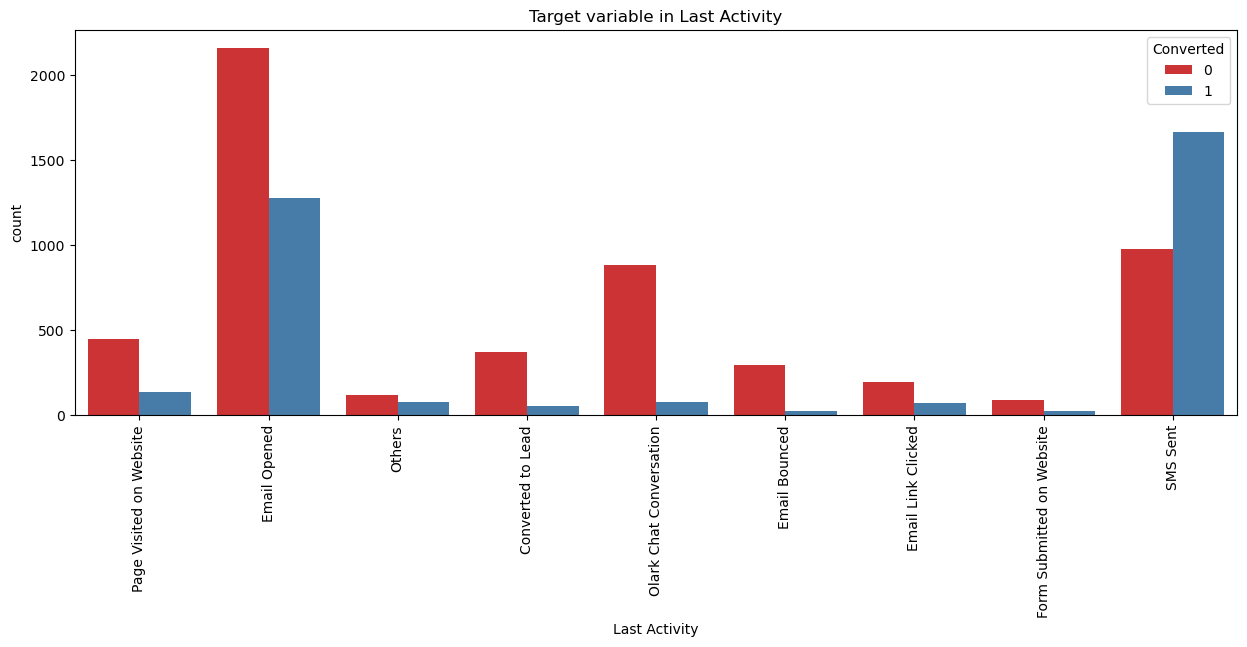

In [52]:
plot_columns('Last Activity')

SMS sent and Email Opened as their last activity has maximum leads and lead conversions.

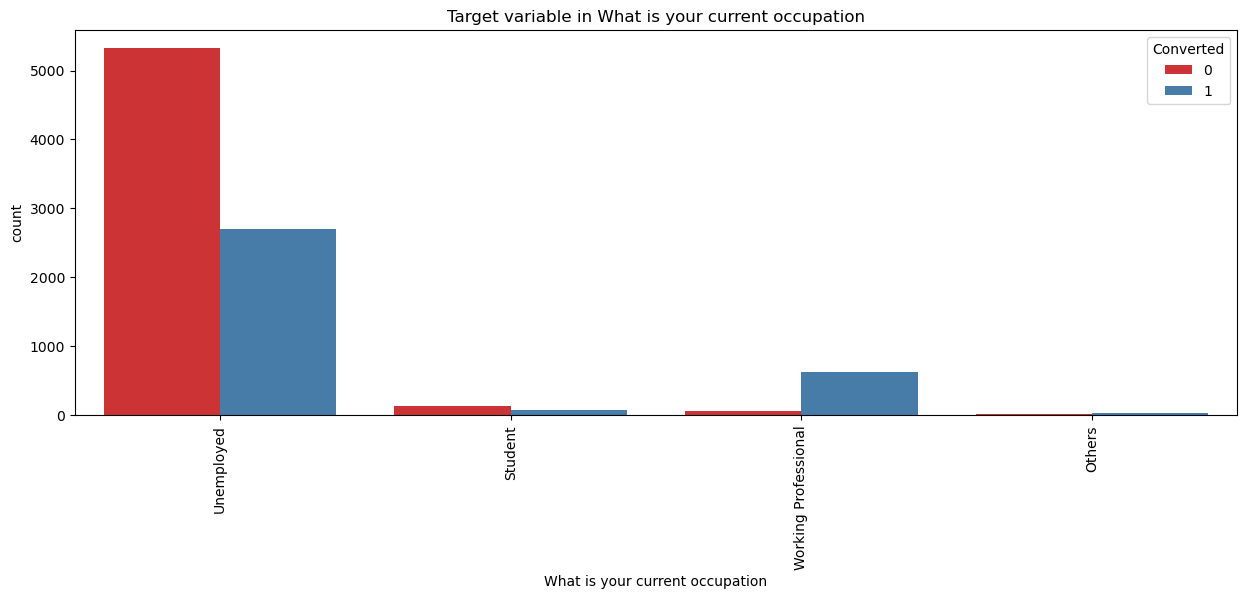

In [53]:
plot_columns('What is your current occupation')

Maximum leads have occupation as Unemployed, and conversion rate of working professional is good. 
so it is important to focus on unemployed and working professionals. 
Houswives have least leads.

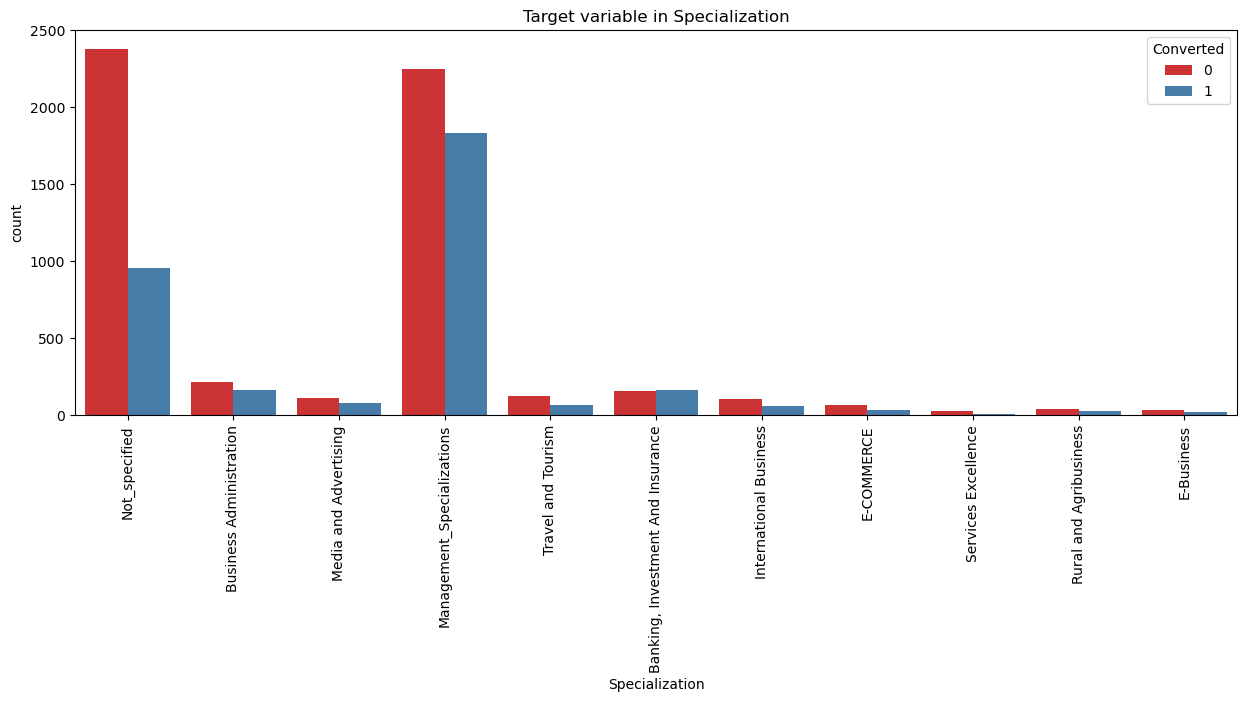

In [54]:
plot_columns('Specialization')

#### Not_specified has maximum number of leads.

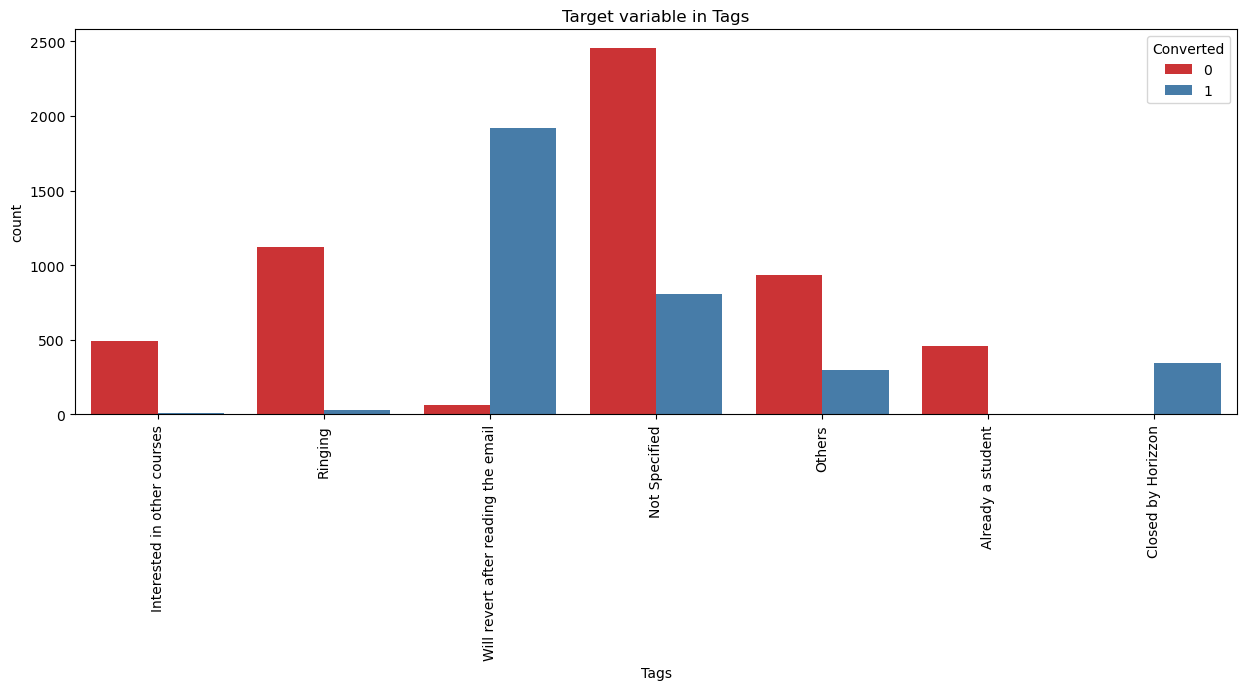

In [55]:
plot_columns('Tags')

### Bivariate Analysis

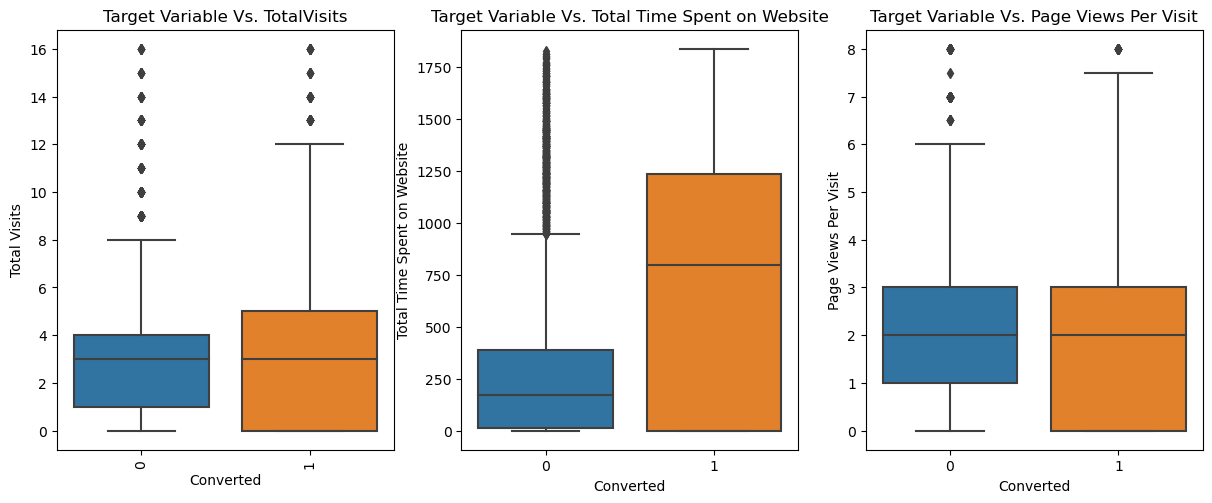

In [56]:
plt.figure(figsize=(20, 12))
plt.subplot(2,4,1)
sns.boxplot(data = lead, x = 'Converted', y = 'TotalVisits')
plt.title('Target Variable Vs.'+' '+ 'TotalVisits')
plt.xlabel('Converted')
plt.ylabel('Total Visits')
plt.xticks(rotation = 90)
plt.subplot(2,4,2)
sns.boxplot(data = lead, x = 'Converted', y = 'Total Time Spent on Website')
plt.title('Target Variable Vs.'+' '+ 'Total Time Spent on Website')
plt.xlabel('Converted')
plt.ylabel('Total Time Spent on Website')
plt.subplot(2,4,3)
sns.boxplot(data = lead, x = 'Converted', y = 'Page Views Per Visit')
plt.title('Target Variable Vs.'+' '+ 'Page Views Per Visit')
plt.xlabel('Converted')
plt.ylabel('Page Views Per Visit')
plt.show()


Page Views Per Visit - Median for both types of Leads i.e converted and non converted are similar so Nothing can be concluded.
Total visits - more the number of visits, more chances of lead  conversion 
Total Time Spent on website concludes if person is spending more time on website , has more chances of lead conversion.

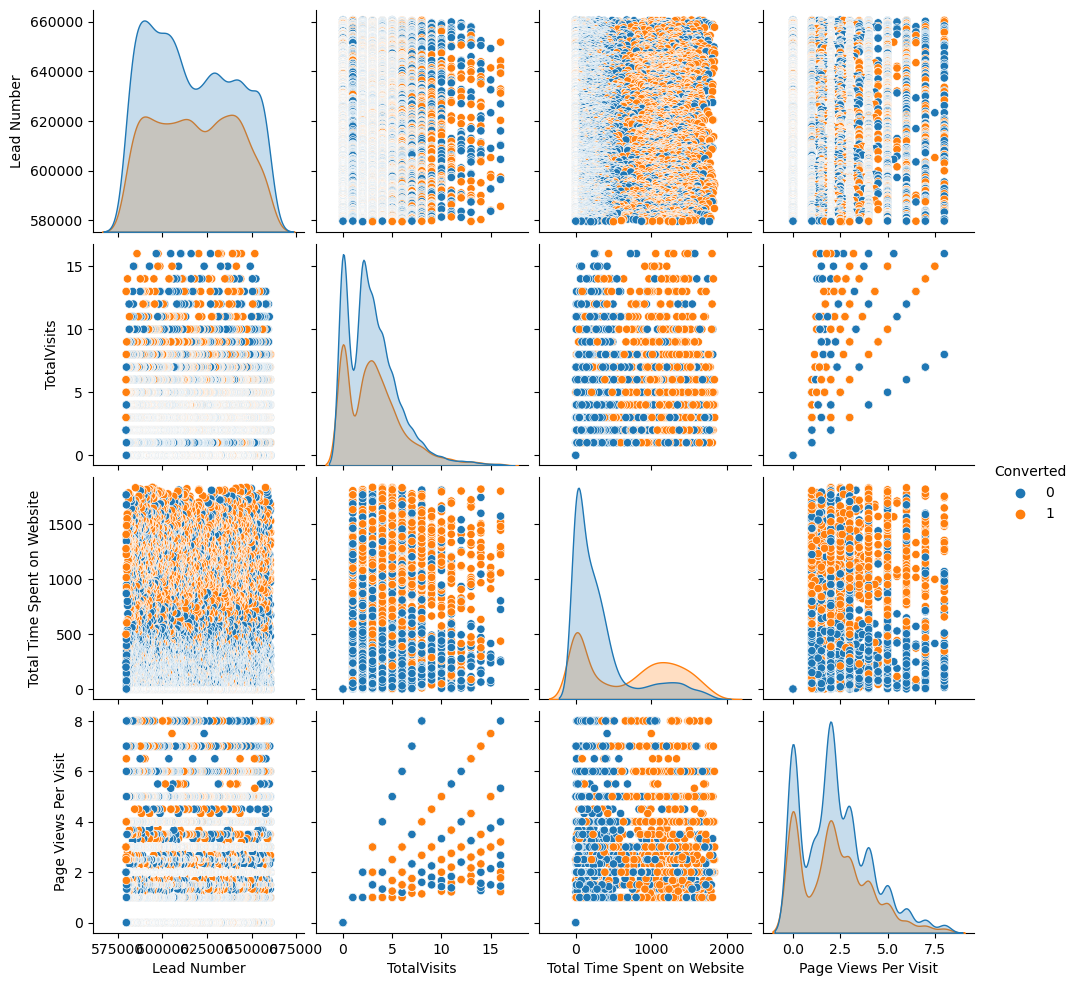

In [57]:
#pairplot
sns.pairplot(lead, hue='Converted')
plt.show()

In [58]:
lead.corr()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
Lead Number,1.000000,0.025785,0.054439,0.024225,0.066230
Converted,0.025785,1.000000,0.046213,0.359088,-0.009048
TotalVisits,0.054439,0.046213,1.000000,0.355712,0.725259
Total Time Spent on Website,0.024225,0.359088,0.355712,1.000000,0.353125
Page Views Per Visit,0.066230,-0.009048,0.725259,0.353125,1.000000


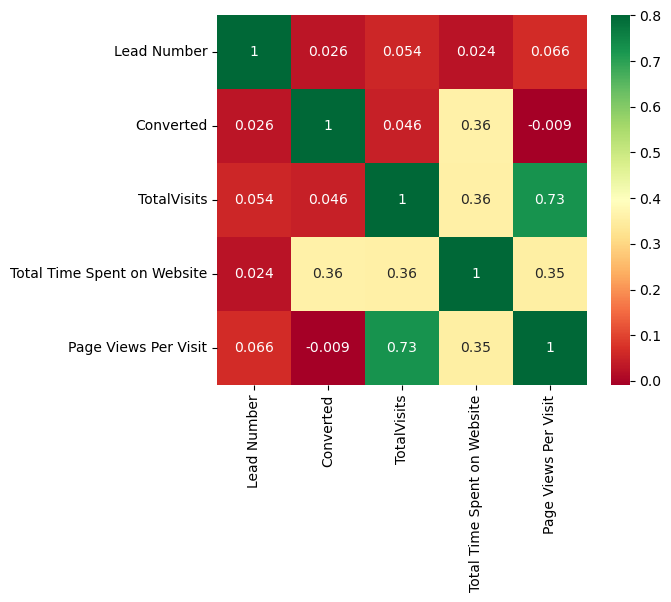

In [59]:
#heatmap
sns.heatmap(lead.corr(),cmap="RdYlGn",vmax=.8, annot=True, square = True)
plt.show()

Variables are not highly correlated with each other.

# Step 4 : Data Preparation and Feature Selection

In [60]:
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,Lead Profile,City,A free copy of Mastering The Interview
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Not_specified,Unemployed,Interested in other courses,NaN,Mumbai,No
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,5.0,674,2.5,Email Opened,Not_specified,Unemployed,Ringing,NaN,Mumbai,No
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Potential Lead,Mumbai,Yes
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Others,Media and Advertising,Unemployed,Ringing,NaN,Mumbai,No
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,Not_specified,Unemployed,Will revert after reading the email,NaN,Mumbai,No


In [61]:
# mapping columns

lead['A free copy of Mastering The Interview'] = lead['A free copy of Mastering The Interview'].apply(lambda x: 1 if x=='Yes'else 0)

In [62]:
# droping Prospect ID as it has only unique numbers and characters

lead.drop(['Prospect ID','Lead Number'],1,inplace=True)
lead.head()

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,Lead Profile,City,A free copy of Mastering The Interview
0,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Not_specified,Unemployed,Interested in other courses,NaN,Mumbai,0
1,API,Organic Search,0,5.0,674,2.5,Email Opened,Not_specified,Unemployed,Ringing,NaN,Mumbai,0
2,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Potential Lead,Mumbai,1
3,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Others,Media and Advertising,Unemployed,Ringing,NaN,Mumbai,0
4,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,Not_specified,Unemployed,Will revert after reading the email,NaN,Mumbai,0


In [63]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8938 entries, 0 to 9239
Data columns (total 13 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             8938 non-null   object 
 1   Lead Source                             8938 non-null   object 
 2   Converted                               8938 non-null   int64  
 3   TotalVisits                             8938 non-null   float64
 4   Total Time Spent on Website             8938 non-null   int64  
 5   Page Views Per Visit                    8938 non-null   float64
 6   Last Activity                           8938 non-null   object 
 7   Specialization                          8938 non-null   object 
 8   What is your current occupation         8938 non-null   object 
 9   Tags                                    8938 non-null   object 
 10  Lead Profile                            2300 non-null   obje

In [64]:
# Creating dummies of Categorical Variables

dummies_lead = pd.get_dummies(lead[['Lead Origin','What is your current occupation','City']])
dummies_lead.head()

,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Others,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Mumbai,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
0,1,0,0,0,0,0,1,0,1,0,0,0,0,0
1,1,0,0,0,0,0,1,0,1,0,0,0,0,0
2,0,1,0,0,0,1,0,0,1,0,0,0,0,0
3,0,1,0,0,0,0,1,0,1,0,0,0,0,0
4,0,1,0,0,0,0,1,0,1,0,0,0,0,0


In [65]:
dummies_lead1 =pd.get_dummies(lead['Last Activity'],prefix='Last Activity')
dummies_lead1 = dummies_lead1.drop(['Last Activity_Others'], axis=1)
dummies_lead1.head()

,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent
0,0,0,0,0,0,0,1,0
1,0,0,0,1,0,0,0,0
2,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0


In [66]:
dummies_lead2=pd.get_dummies(lead['Lead Source'],prefix='Lead Source')
dummies_lead2 = dummies_lead2.drop(['Lead Source_Others'], axis=1)
dummies_lead2.head()

,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Social Media,Lead Source_Welingak Website
0,0,0,1,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0


In [67]:
dummies_lead3=pd.get_dummies(lead['Specialization'],prefix='Specialization')
dummies_lead3 = dummies_lead3.drop(['Specialization_Not_specified'], axis=1)
dummies_lead3.head()

,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management_Specializations,Specialization_Media and Advertising,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism
0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0


In [68]:
dummies_lead4=pd.get_dummies(lead['Tags'],prefix='Tags')
dummies_lead4 = dummies_lead4.drop(['Tags_Others'], axis=1)
dummies_lead4.head()

,Tags_Already a student,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Not Specified,Tags_Ringing,Tags_Will revert after reading the email
0,0,0,1,0,0,0
1,0,0,0,0,1,0
2,0,0,0,0,0,1
3,0,0,0,0,1,0
4,0,0,0,0,0,1


In [69]:
lead = pd.concat([lead,dummies_lead,dummies_lead1,dummies_lead2,dummies_lead3,dummies_lead4],axis=1)
lead.head()

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,...,Specialization_Media and Advertising,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,Tags_Already a student,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Not Specified,Tags_Ringing,Tags_Will revert after reading the email
0,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Not_specified,Unemployed,Interested in other courses,...,0,0,0,0,0,0,1,0,0,0
1,API,Organic Search,0,5.0,674,2.5,Email Opened,Not_specified,Unemployed,Ringing,...,0,0,0,0,0,0,0,0,1,0
2,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,...,0,0,0,0,0,0,0,0,0,1
3,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Others,Media and Advertising,Unemployed,Ringing,...,1,0,0,0,0,0,0,0,1,0
4,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,Not_specified,Unemployed,Will revert after reading the email,...,0,0,0,0,0,0,0,0,0,1


In [70]:
drop_cols=['Lead Origin','Lead Source','Last Activity','Specialization','What is your current occupation','Tags'
          ,'City',]
lead.drop(drop_cols,axis=1,inplace=True)

In [71]:
lead.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Profile,A free copy of Mastering The Interview,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,...,Specialization_Media and Advertising,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,Tags_Already a student,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Not Specified,Tags_Ringing,Tags_Will revert after reading the email
0,0,0.0,0,0.0,NaN,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,5.0,674,2.5,NaN,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1,2.0,1532,2.0,Potential Lead,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,1.0,305,1.0,NaN,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
4,1,2.0,1428,1.0,NaN,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [72]:
lead = lead.drop('Lead Profile',1)

# Step 5 : Splitting the data into Training and Testing sets

In [73]:
from sklearn.model_selection import train_test_split

In [74]:
x = lead.drop('Converted',axis=1)
y = lead['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [75]:
# Splitting the data into train and test 

x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.7,test_size=0.3, random_state=100)

In [76]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6256 entries, 1046 to 5814
Data columns (total 51 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   TotalVisits                                           6256 non-null   float64
 1   Total Time Spent on Website                           6256 non-null   int64  
 2   Page Views Per Visit                                  6256 non-null   float64
 3   A free copy of Mastering The Interview                6256 non-null   int64  
 4   Lead Origin_API                                       6256 non-null   uint8  
 5   Lead Origin_Landing Page Submission                   6256 non-null   uint8  
 6   Lead Origin_Lead Add Form                             6256 non-null   uint8  
 7   Lead Origin_Lead Import                               6256 non-null   uint8  
 8   What is your current occupation_Others                6

In [77]:
lead.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Others,...,Specialization_Media and Advertising,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,Tags_Already a student,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Not Specified,Tags_Ringing,Tags_Will revert after reading the email
0,0,0.0,0,0.0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,5.0,674,2.5,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1,2.0,1532,2.0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,1.0,305,1.0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,1,2.0,1428,1.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [78]:
# scaling numeric columns

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
num_cols=x_train.select_dtypes(include=['float64','int64']).columns
x_train[num_cols] = scaler.fit_transform(x_train[num_cols])
x_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Others,What is your current occupation_Student,...,Specialization_Media and Advertising,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,Tags_Already a student,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Not Specified,Tags_Ringing,Tags_Will revert after reading the email
1046,-1.091963,-0.880590,-1.206418,-0.666186,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
8738,-0.032570,0.685825,0.425131,1.501083,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7818,-0.032570,1.550381,-0.390643,1.501083,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
498,0.320561,-0.470068,0.968981,1.501083,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2169,2.439348,0.797442,-0.428713,1.501083,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [79]:
## Model Building using Stats Model & RFE
import statsmodels.api as sm
from sklearn.feature_selection import RFE

In [80]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
rfe = RFE(logreg, n_features_to_select=15)             # running RFE with 15 variables as output
rfe = rfe.fit(x_train, y_train)

In [81]:
rfe.support_

array([False,  True, False, False, False, False,  True, False, False,
       False, False,  True, False, False, False, False, False, False,
       False,  True, False,  True, False,  True, False,  True, False,
       False,  True, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False,  True,
        True,  True,  True, False,  True,  True])

In [82]:
list(zip(x_train.columns,rfe.support_,rfe.ranking_))

[('TotalVisits', False, 18),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 16),
 ('A free copy of Mastering The Interview', False, 36),
 ('Lead Origin_API', False, 19),
 ('Lead Origin_Landing Page Submission', False, 4),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 7),
 ('What is your current occupation_Others', False, 24),
 ('What is your current occupation_Student', False, 15),
 ('What is your current occupation_Unemployed', False, 23),
 ('What is your current occupation_Working Professional', True, 1),
 ('City_Mumbai', False, 28),
 ('City_Other Cities', False, 27),
 ('City_Other Cities of Maharashtra', False, 29),
 ('City_Other Metro Cities', False, 5),
 ('City_Thane & Outskirts', False, 13),
 ('City_Tier II Cities', False, 20),
 ('Last Activity_Converted to Lead', False, 12),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Email Link Clicked', False, 32),
 ('Last Activity_Email Opened', True, 1),
 ('Last Acti

In [83]:
# list of RFE supported columns 

cols = x_train.columns[rfe.support_]
cols

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'What is your current occupation_Working Professional',
       'Last Activity_Email Bounced', 'Last Activity_Email Opened',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Specialization_Travel and Tourism', 'Tags_Already a student',
       'Tags_Closed by Horizzon', 'Tags_Interested in other courses',
       'Tags_Ringing', 'Tags_Will revert after reading the email'],
      dtype='object')

In [84]:
x_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit',
       'A free copy of Mastering The Interview', 'Lead Origin_API',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'What is your current occupation_Others',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed', 'City_Mumbai',
       'City_Other Cities', 'City_Other Cities of Maharashtra',
       'City_Other Metro Cities', 'City_Thane & Outskirts',
       'City_Tier II Cities', 'Last Activity_Converted to Lead',
       'Last Activity_Email Link Clicked',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Page Visited on Website', 'Lead Source_Direct Traffic',
       'Lead Source_Google', 'Lead Source_Organic Search',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Lead Source_Social Media', 'Lead Source_Social Media ',
       'Specialization_Banking, Investment And Insurance',
       'Specialization_Business Administra

In [85]:
# MODEL BUILDING #1

x_train_sm = sm.add_constant(x_train[cols])
logm1 = sm.GLM(y_train,x_train_sm,family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6256
Model:                            GLM   Df Residuals:                     6240
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1477.2
Date:                Sun, 19 Mar 2023   Deviance:                       2954.5
Time:                        15:38:52   Pearson chi2:                 7.72e+03
No. Iterations:                     9   Pseudo R-squ. (CS):             0.5745
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.6491      0.139    -19.019      0.000      -2.922      -2.376
Total Time Spent on Website                              1.1569      0.055     20.882      0.000       1.048       1.265
Lead Origin_Lead Add Form                                1.5983      0.316      5.053      0.000       0.978       2.218
What is your current occupation_Working Professional     0.8259      0.307      2.691      0.007       0.224       1.427
Last Activity_Email Bounced                             -0.8323      0.395     -2.109      0.035      -1.606      -0.059
Last Activity_Email Opened                               0.8411      0.150      5.620      0.000       0.548       1.134
Last Activity_Olark Chat Conversation                   -0.9047      0.244     -3.702      0.000      -1.384      -0.426
Last Activity_SMS Sent                                   2.1826      0.154     14.214      0.000       1.882       2.484
Lead Source_Olark Chat                                   1.5770      0.137     11.503      0.000       1.308       1.846
Lead Source_Welingak Website                             4.9410      1.065      4.641      0.000       2.855       7.028
Specialization_Travel and Tourism                       -0.9078      0.357     -2.542      0.011      -1.608      -0.208
Tags_Already a student                                  -4.2365      1.012     -4.184      0.000      -6.221      -2.252
Tags_Closed by Horizzon                                  5.8848      0.727      8.095      0.000       4.460       7.310
Tags_Interested in other courses                        -2.5919      0.447     -5.797      0.000      -3.468      -1.716
Tags_Ringing                                            -2.9220      0.230    -12.686      0.000      -3.373      -2.471
Tags_Will revert after reading the email                 4.3386      0.181     23.943      0.000       3.983       4.694
========================================================================================================================
"""

#### Since all variables have less p-value, we can check the variance inflation factor to see if there is any correlation between the variables

In [86]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [87]:
# Creating a dataframe that will contain the names of all the feature variables and their respective VIFs.
vif = pd.DataFrame()
vif['Features'] = x_train[cols].columns
vif['VIF'] = [variance_inflation_factor(x_train[cols].values,i) for i in range(x_train[cols].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending= False)
vif

,Features,VIF
14,Tags_Will revert after reading the email,1.95
1,Lead Origin_Lead Add Form,1.82
7,Lead Source_Olark Chat,1.80
6,Last Activity_SMS Sent,1.61
4,Last Activity_Email Opened,1.56
5,Last Activity_Olark Chat Conversation,1.48
0,Total Time Spent on Website,1.40
2,What is your current occupation_Working Profes...,1.32
11,Tags_Closed by Horizzon,1.32
8,Lead Source_Welingak Website,1.29


In [88]:
# So the Values all seem to be in order now, Lets derive Probabilities, Lead Score and Predictions on train data

In [89]:
# Getting the Predicted values on the train set
y_train_pred = res.predict(x_train_sm)
y_train_pred[:10]

1046    0.993657
8738    0.266088
7818    0.999285
498     0.086922
2169    0.292054
6131    0.032268
4590    0.016518
6939    0.248463
985     0.988345
5595    0.008627
dtype: float64

In [90]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.99365719, 0.26608848, 0.99928518, 0.08692217, 0.29205364,
       0.03226848, 0.01651752, 0.24846291, 0.98834482, 0.0086274 ])

In [91]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values,'Converted_prob':y_train_pred})
y_train_pred_final['Lead Number'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Lead Number
0,1,0.993657,1046
1,0,0.266088,8738
2,1,0.999285,7818
3,0,0.086922,498
4,0,0.292054,2169


In [92]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x>0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Lead Number,Predicted
0,1,0.993657,1046,1
1,0,0.266088,8738,0
2,1,0.999285,7818,1
3,0,0.086922,498,0
4,0,0.292054,2169,0


In [93]:
from sklearn import metrics 

# Confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Converted,y_train_pred_final.Predicted)
print(confusion)

[[3668  219]
 [ 374 1995]]


In [94]:
# Lets check the overall accuracy.

print(metrics.accuracy_score(y_train_pred_final.Converted,y_train_pred_final.Predicted))

0.9052109974424553


In [95]:
TP = confusion[1,1] # true positives
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [96]:
# Lets see the sensitivity of our logistic regression model
TP/float(TP+FN)

0.8421274799493457

In [97]:
# Lets see the specificity 
TN/float(TN+FP)

0.9436583483406226

In [98]:
# Calculate False Positive Rate - predicting conversion when customer does not have convert
print(FP/float(TN+FP))

0.05634165165937741


In [99]:
# positive predictive value
print(TP/float(TP+FP))

0.9010840108401084


In [100]:
# negative predictive value 
print(TN/float(TN+FN))

0.9074715487382484


## Plotting ROC Curve

In [101]:
def draw_roc(actual,probs):
    fpr, tpr, thresholds = metrics.roc_curve(actual,probs,drop_intermediate=False)
    auc_score = metrics.roc_auc_score(actual,probs)
    plt.figure(figsize=(5,5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' %auc_score)
    plt.plot([0,1],[0,1],'k--')
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc='lower right')
    plt.show()
    
    return None

In [102]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final.Converted,y_train_pred_final.Converted_prob,drop_intermediate=False)

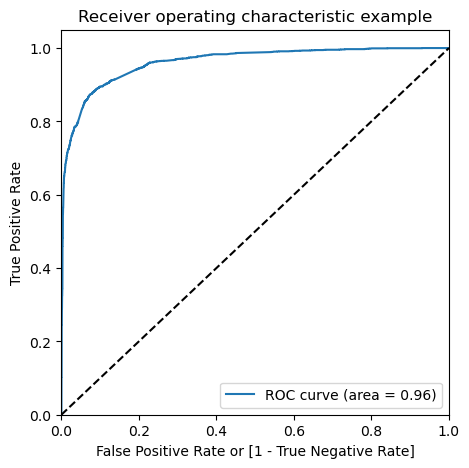

In [103]:
draw_roc(y_train_pred_final.Converted,y_train_pred_final.Converted_prob)

#### We are getting 0.96 which is close to 1.

## Finding Optimal Cutoff point 

In [104]:
# Let's create columns with different probability cutoffs
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Lead Number,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.993657,1046,1,1,1,1,1,1,1,1,1,1,1
1,0,0.266088,8738,0,1,1,1,0,0,0,0,0,0,0
2,1,0.999285,7818,1,1,1,1,1,1,1,1,1,1,1
3,0,0.086922,498,0,1,0,0,0,0,0,0,0,0,0
4,0,0.292054,2169,0,1,1,1,0,0,0,0,0,0,0


In [105]:
# let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_lead = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix


num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_lead.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_lead)

     prob  accuracy     sensi     speci
0.0   0.0  0.378676  1.000000  0.000000
0.1   0.1  0.802590  0.970030  0.700540
0.2   0.2  0.852142  0.946813  0.794443
0.3   0.3  0.899457  0.890671  0.904811
0.4   0.4  0.906170  0.865344  0.931052
0.5   0.5  0.905211  0.842127  0.943658
0.6   0.6  0.896899  0.781764  0.967070
0.7   0.7  0.890985  0.752638  0.975302
0.8   0.8  0.882673  0.717180  0.983535
0.9   0.9  0.865889  0.659350  0.991767


<function matplotlib.pyplot.show(close=None, block=None)>

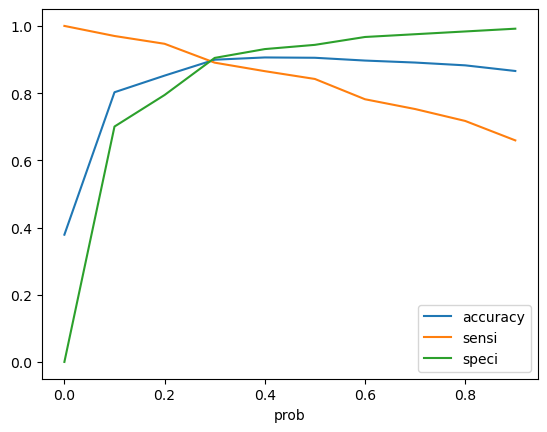

In [106]:
# Lets plot accuracy , sensitivity and specificity for various probabilities.

cutoff_lead.plot.line(x='prob',y=['accuracy','sensi','speci'])
plt.show

#### From the above curve, 0.3 is the optimum point to take it as a cutoff probability.


In [107]:
y_train_pred_final['Final_Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.3 else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Lead Number,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Final_Predicted
0,1,0.993657,1046,1,1,1,1,1,1,1,1,1,1,1,1
1,0,0.266088,8738,0,1,1,1,0,0,0,0,0,0,0,0
2,1,0.999285,7818,1,1,1,1,1,1,1,1,1,1,1,1
3,0,0.086922,498,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.292054,2169,0,1,1,1,0,0,0,0,0,0,0,0


In [108]:
y_train_pred_final['Lead Score'] = y_train_pred_final.Converted_prob.map(lambda x: round(x*100))
y_train_pred_final[['Converted','Converted_prob','Lead Number','Final_Predicted','Lead Score']].head()

,Converted,Converted_prob,Lead Number,Final_Predicted,Lead Score
0,1,0.993657,1046,1,99
1,0,0.266088,8738,0,27
2,1,0.999285,7818,1,100
3,0,0.086922,498,0,9
4,0,0.292054,2169,0,29


In [109]:
# Lets check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted,y_train_pred_final.Final_Predicted))

0.8994565217391305


In [110]:
confusion_1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Final_Predicted)
confusion_1

array([[3517,  370],
       [ 259, 2110]], dtype=int64)

In [111]:
TP = confusion_1[1,1] # true positives
TN = confusion_1[0,0] # true negatives
FP = confusion_1[0,1] # false positives
FN = confusion_1[1,0] # false negatives

In [112]:
# Lets see the sensitivity of our logistic regression model
TP/float(TP+FN)

0.8906711692697341

In [113]:
# Lets see the specificity 
TN/float(TN+FP)

0.9048109081553898

## Observation:

#### So as we can see above the model seems to be performing well. The ROC curve has a value of 0.96, which is good. We have the following values for the Train Data:

#### Accuracy : 89.94%
#### Sensitivity : 89.06%
#### Specificity : 90.48%

In [114]:
# Calculate False Positive Rate - predicting conversion when customer does not have convert
print(FP/float(TN+FP))

0.09518909184461023


In [115]:
# positive predictive value
print(TP/float(TP+FP))

0.8508064516129032


In [116]:
# negative predictive value 
print(TN/float(TN+FN))

0.9314088983050848


In [117]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted,y_train_pred_final.Final_Predicted)
print(confusion)

[[3517  370]
 [ 259 2110]]


In [118]:
#### Precision
TP/TP+FP
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.8508064516129032

In [119]:
#### Recall
TP/TP+FN
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.8906711692697341

In [120]:
from sklearn.metrics import precision_score, recall_score

In [121]:
precision_score(y_train_pred_final.Converted , y_train_pred_final.Final_Predicted)

0.8508064516129032

In [122]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.Final_Predicted)

0.8906711692697341

In [123]:
from sklearn.metrics import precision_recall_curve

In [124]:
y_train_pred_final.Converted, y_train_pred_final.Final_Predicted

(0       1
 1       0
 2       1
 3       0
 4       0
        ..
 6251    0
 6252    1
 6253    0
 6254    0
 6255    0
 Name: Converted, Length: 6256, dtype: int64,
 0       1
 1       0
 2       1
 3       0
 4       0
        ..
 6251    0
 6252    1
 6253    0
 6254    0
 6255    0
 Name: Final_Predicted, Length: 6256, dtype: int64)

In [125]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted,y_train_pred_final.Converted_prob)

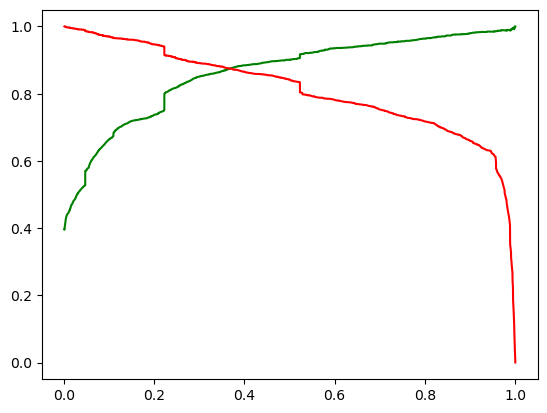

In [126]:
plt.plot(thresholds,p[:-1],"g-")
plt.plot(thresholds,r[:-1],"r-")
plt.show()

In [127]:
# Scaling test set
num_cols = x_test.select_dtypes(include=['float64','int64']).columns
x_test[num_cols] = scaler.fit_transform(x_test[num_cols])
x_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Others,What is your current occupation_Student,...,Specialization_Media and Advertising,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,Tags_Already a student,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Not Specified,Tags_Ringing,Tags_Will revert after reading the email
871,0.728634,-0.185028,1.556693,-0.652562,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
6947,-0.379187,2.214899,-0.121034,1.532421,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
8265,1.836456,2.416463,3.234420,1.532421,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3406,-1.117735,-0.893327,-1.239518,-0.652562,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6147,0.359360,-0.731323,0.997451,1.532421,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [128]:
x_test = x_test[cols]
x_test.head()

,Total Time Spent on Website,Lead Origin_Lead Add Form,What is your current occupation_Working Professional,Last Activity_Email Bounced,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,Lead Source_Olark Chat,Lead Source_Welingak Website,Specialization_Travel and Tourism,Tags_Already a student,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Ringing,Tags_Will revert after reading the email
871,-0.185028,0,0,0,0,0,0,0,0,0,0,0,0,1,0
6947,2.214899,0,0,0,0,0,1,0,0,0,0,0,0,0,0
8265,2.416463,0,1,0,0,0,1,0,0,0,0,0,0,0,0
3406,-0.893327,1,0,0,0,0,1,0,1,0,0,0,0,0,0
6147,-0.731323,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [129]:
x_test_sm = sm.add_constant(x_test)

## Predictions on test set

In [130]:
y_test_pred = res.predict(x_test_sm)

In [131]:
y_test_pred[:10]

871     0.003063
6947    0.890502
8265    0.959104
3406    0.993564
6147    0.212052
1512    0.975050
937     0.032913
5486    0.220208
3244    0.978776
9168    0.275446
dtype: float64

In [132]:
# Converting y_pred into DataFrame
y_pred = pd.DataFrame(y_test_pred)
y_pred.head()

,0
871,0.003063
6947,0.890502
8265,0.959104
3406,0.993564
6147,0.212052


In [133]:
# Converting y_test into DataFrame
y_test_df =pd.DataFrame(y_test)

In [134]:
# Putting Lead Number to Index
y_test_df['Lead Number'] = y_test_df.index

In [135]:
# Removing index for both dataframes to append them side by side
y_pred.reset_index(drop=True,inplace=True)
y_test_df.reset_index(drop=True,inplace=True)

In [136]:
# Concating y_pred and y_test_df
y_pred_final = pd.concat([y_test_df,y_pred],axis=1)

In [137]:
y_pred_final.head()

,Converted,Lead Number,0
0,0,871,0.003063
1,1,6947,0.890502
2,1,8265,0.959104
3,1,3406,0.993564
4,1,6147,0.212052


In [138]:
# Renaming the column
y_pred_final = y_pred_final.rename(columns={0:'Converted_prob'})

In [139]:
y_pred_final.head()

,Converted,Lead Number,Converted_prob
0,0,871,0.003063
1,1,6947,0.890502
2,1,8265,0.959104
3,1,3406,0.993564
4,1,6147,0.212052


In [140]:
# Rearranging the columns 
y_pred_final = y_pred_final[['Lead Number','Converted','Converted_prob']]
y_pred_final['Lead Score'] = y_pred_final.Converted_prob.map(lambda x: round(x*100))

In [141]:
y_pred_final.head()

,Lead Number,Converted,Converted_prob,Lead Score
0,871,0,0.003063,0
1,6947,1,0.890502,89
2,8265,1,0.959104,96
3,3406,1,0.993564,99
4,6147,1,0.212052,21


In [142]:
y_pred_final['Final_Predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.3 else 0)

In [143]:
y_pred_final.head()

,Lead Number,Converted,Converted_prob,Lead Score,Final_Predicted
0,871,0,0.003063,0,0
1,6947,1,0.890502,89,1
2,8265,1,0.959104,96,1
3,3406,1,0.993564,99,1
4,6147,1,0.212052,21,0


In [144]:
# Lets check the overall accuracy.
print(metrics.accuracy_score(y_pred_final.Converted,y_pred_final.Final_Predicted))

0.8959731543624161


In [145]:
confusion_1 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.Final_Predicted)
confusion_1

array([[1477,  159],
       [ 120,  926]], dtype=int64)

In [146]:
TP = confusion_1[1,1] # true positives
TN = confusion_1[0,0] # true negatives
FP = confusion_1[0,1] # false positives
FN = confusion_1[1,0] # false negatives

In [147]:
# Lets see the sensitivity of our logistic regression model
TP/float(TP+FN)

0.8852772466539197

In [148]:
# Lets see the specificity 
TN/float(TN+FP)

0.9028117359413202

In [149]:
precision_score(y_pred_final.Converted , y_pred_final.Final_Predicted)

0.8534562211981567

In [150]:
recall_score(y_pred_final.Converted, y_pred_final.Final_Predicted)

0.8852772466539197

## Observations on test set:

#### After running the model on the Test Data these are the outcomes we obtain:

#### Accuracy : 89.59%
#### Sensitivity : 88.52%
#### Specificity : 90.28%

## Final Observation:

#### Lets compare the values obtained for Train and Test Sets.

### Train Data :

#### Accuracy : 89.94%
#### Sensitivity : 89.06%
#### Specificity : 90.48%

### Test Data :

#### Accuracy : 89.59%
#### Sensitivity : 88.52%
#### Specificity : 90.28%

## Model seems to predict the Conversion rate and CEO can make good calls based on this model.